In [4]:
import os
import django
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'rest.settings')
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
django.setup()

In [20]:
import json

import pandas as pd
import matplotlib.pyplot as plt

from django.core import serializers

In [18]:
def get_submissions() -> pd.DataFrame:
    '''Get all the submissions into a dataframe.'''
    for sub in Submission.objects.all():
        sub_dict = {
            'created': sub.created,
            'slackid': sub.slackid,
            'learning_unit': sub.learning_unit,
            'exercise_notebook': sub.exercise_notebook,
            'score': sub.score,
        }

    data = serializers.serialize("json", Submission.objects.all())
    data = json.loads(data)
    submissions = [sub['fields'] for sub in data]

    df = pd.DataFrame(submissions)
    
    return df

def get_submissions_plot_data(df: pd.DataFrame) -> pd.DataFrame:
    '''
    Transform the submissions data into a dataframe ready to be ploted.
    
    param df from get_submissions()
    '''
    df_plot = (
        df
        .groupby(['learning_unit', 'exercise_notebook'])
        .slackid
        .count()
        .reset_index()
        .pivot(index='learning_unit', columns='exercise_notebook', values='slackid')
        .fillna(0)
        .astype(int)
    )
    
    return df_plot

def plot_submissions(df_plot):
    '''
    Plot the submissions, save the plot.
    
    param df_plot from get_submissions_plot_data()
    '''
    ax = df_plot.plot.bar(figsize=(20, 4))
    plt.xticks(rotation=0)
    fig = ax.get_figure()
    fig.savefig('plot_submissions.png')
    


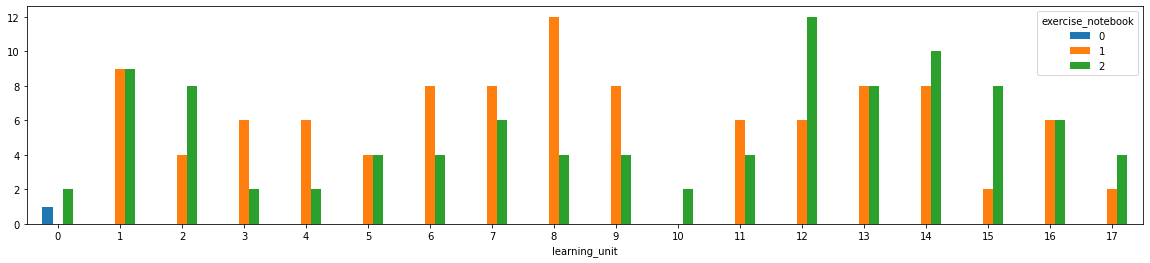

In [19]:
df = get_submissions()
df_plot = get_submissions_plot_data(df)
plot_submissions(df_plot)